# Задача 3.5

Почитаем для всех кодов со скоростью $R = \dfrac{1}{2}$ из таблицы границы Хэмминга и Варшамова–Гилберта. Результаты сравнения на графике

In [3]:
from scipy.special import binom

def bord(n, k):
    # Hemm
    M = 2 ** k
    max_h_d = 0
    for d in range(2, n + 1):
        t = (d - 1) // 2
        if M <= 2 ** n / sum([binom(n, i) for i in range(0, t + 1)]):
            max_h_d = d

    # V.G.
    max_vg_d = 0
    for d in range(2, n + 1):
        if 2 ** (n - k) > sum([binom(n - 1, i) for i in range(d - 1)]):
            max_vg_d = d

    return (max_h_d, max_vg_d)

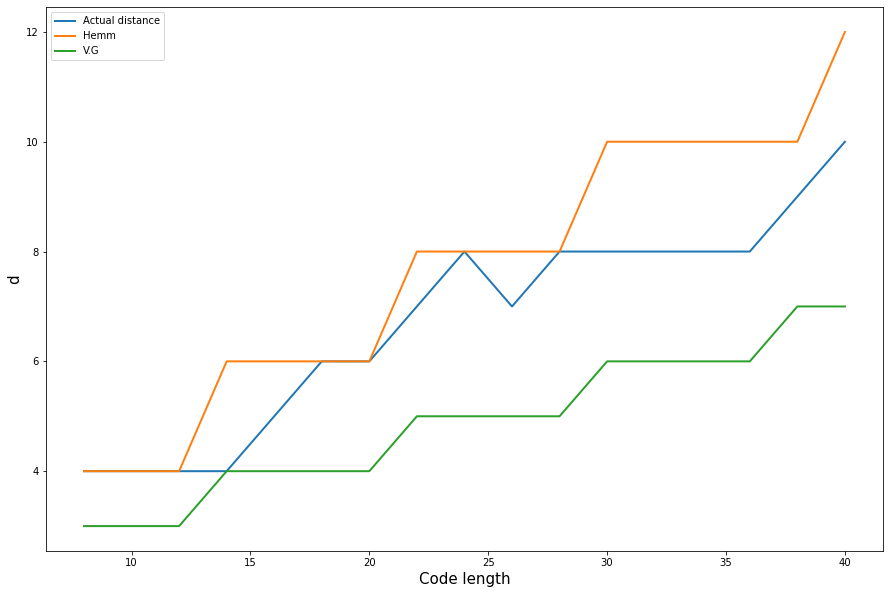

In [13]:
import matplotlib.pyplot as plt

ns = list(range(8, 41, 2))
ks = list(range(4, 21))
ds = [4, 4, 4, 4, 5, 6, 6, 7, 8, 7, 8, 8, 8, 8, 8, 9, 10]

hds = []
vgds = []
for i in range(len(ns)):
    h_d, vg_d = bord(ns[i], ks[i])
    hds.append(h_d)
    vgds.append(vg_d)
    
plt.figure(figsize=(15, 10))
plt.plot(ns, ds, label='Actual distance', linewidth=2)
plt.plot(ns, hds, label='Hemm', linewidth=2)
plt.plot(ns, vgds, label='V.G', linewidth=2)

plt.xlabel('Code length', fontsize=15)
plt.ylabel('d', fontsize=15)
plt.legend()
plt.show()